In [1]:
import pandas

In [41]:
holidays = pandas.read_csv("energy_holidays.csv")
metadata = pandas.read_csv("energy_metadata.csv")
frequency= pandas.read_csv("energy_submission_frequency.csv")
train = pandas.read_csv("energy_train.csv")
weather = pandas.read_csv("weather.csv")


In [11]:
holidays.info()
holidays.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 4 columns):
Unnamed: 0    8387 non-null int64
Date          8387 non-null object
Holiday       8387 non-null object
SiteId        8387 non-null int64
dtypes: int64(2), object(2)
memory usage: 262.2+ KB


,Unnamed: 0,Date,Holiday,SiteId
582,582,2016-05-01,Labour Day,25
2326,2326,2015-11-01,All Saints Day,94
4969,4969,2015-12-26,St Stephen's Day,186
2112,2112,2015-04-06,Easter Monday,87
2533,2533,2017-06-02,Republic Day,102


In [40]:
metadata.info()
metadata.sample(5)
metadata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
SiteId               267 non-null int64
Surface              267 non-null float64
Sampling             267 non-null float64
BaseTemperature      267 non-null float64
MondayIsDayOff       267 non-null bool
TuesdayIsDayOff      267 non-null bool
WednesdayIsDayOff    267 non-null bool
ThursdayIsDayOff     267 non-null bool
FridayIsDayOff       267 non-null bool
SaturdayIsDayOff     267 non-null bool
SundayIsDayOff       267 non-null bool
dtypes: bool(7), float64(3), int64(1)
memory usage: 10.2 KB


,SiteId,Surface,Sampling,BaseTemperature
count,267.000000,267.000000,267.000000,267.000000
mean,157.719101,7894.541319,14.438202,18.026217
std,88.781093,9744.769014,4.715887,0.251436
min,1.000000,14.884534,5.000000,18.000000
25%,80.500000,1047.555756,15.000000,18.000000
50%,161.000000,3719.858954,15.000000,18.000000
75%,234.500000,12886.748054,15.000000,18.000000
max,305.000000,71615.852476,30.000000,21.000000


In [13]:
frequency.info()
frequency.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6974 entries, 0 to 6973
Data columns (total 2 columns):
ForecastId          6974 non-null int64
ForecastPeriodNS    6974 non-null int64
dtypes: int64(2)
memory usage: 109.0 KB


,ForecastId,ForecastPeriodNS
1148,1149,900000000000
175,176,900000000000
1594,1595,900000000000
342,343,900000000000
2642,2643,900000000000


In [14]:
train.info()
train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559830 entries, 0 to 6559829
Data columns (total 5 columns):
obs_id        int64
SiteId        int64
Timestamp     object
ForecastId    int64
Value         float64
dtypes: float64(1), int64(3), object(1)
memory usage: 250.2+ MB


,obs_id,SiteId,Timestamp,ForecastId,Value
3955472,1089643,203,2014-05-23 14:00:00,4199,55741.055471
5974419,3901823,285,2016-11-03 08:00:00,6339,62457.268082
3785216,4890339,199,2014-05-13 22:00:00,4022,108532.355969
1297972,2408319,60,2016-05-10 17:30:00,1379,27579.739183
4281263,3998513,222,2016-10-07 22:45:00,4551,4166.663324


In [42]:
weather.info()
weather.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20017278 entries, 0 to 20017277
Data columns (total 5 columns):
Unnamed: 0     int64
Timestamp      object
Temperature    float64
Distance       float64
SiteId         int64
dtypes: float64(2), int64(2), object(1)
memory usage: 763.6+ MB


,Unnamed: 0,Timestamp,Temperature,Distance,SiteId
624705,3422,2017-03-14 16:30:00,19.0,11.099442,7
582841,43045,2015-02-20 15:30:00,24.0,11.099442,7
3788721,146982,2015-04-02 16:15:00,16.0,28.663082,51
13254924,168369,2015-07-05 10:30:00,30.0,6.791701,235
12306967,109045,2016-12-04 13:50:00,2.0,28.284592,230


In [34]:
train_merge = pandas.merge(train,frequency,on="ForecastId")
train_merge = pandas.merge(train_merge,metadata,on="SiteId")
train_merge["ForecastPeriodMin"] = train_merge["ForecastPeriodNS"]/60000000000

In [35]:
train_merge.sample(5)

,obs_id,SiteId,Timestamp,ForecastId,Value,ForecastPeriodNS,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff,ForecastPeriodMin
5333019,1776210,269,2013-09-30 09:30:00,5661,2.023778e+04,900000000000,1645.582682,5.0,18.0,False,False,False,False,False,True,True,15.0
4012478,391319,204,2015-07-12 22:30:00,4258,1.082676e+06,900000000000,13162.423942,15.0,18.0,False,False,False,False,False,True,True,15.0
22860,6356115,2,2015-12-28 01:00:00,27,3.016288e+04,3600000000000,6098.278376,30.0,18.0,False,False,False,False,False,True,True,60.0
3685764,510159,195,2016-05-01 14:00:00,3918,1.322648e+07,3600000000000,19609.228986,15.0,18.0,False,False,False,False,False,True,True,60.0
4325824,4721526,224,2016-05-15 05:30:00,4597,2.964724e+03,3600000000000,13044.786759,15.0,18.0,False,False,False,False,False,True,True,60.0


In [36]:
train_merge[train_merge.SiteId==39]

,obs_id,SiteId,Timestamp,ForecastId,Value,ForecastPeriodNS,Surface,Sampling,BaseTemperature,MondayIsDayOff,TuesdayIsDayOff,WednesdayIsDayOff,ThursdayIsDayOff,FridayIsDayOff,SaturdayIsDayOff,SundayIsDayOff,ForecastPeriodMin
920404,5426833,39,2015-05-12 14:20:00,984,5455.874114,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920405,7305160,39,2015-05-12 15:20:00,984,4263.734810,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920406,2636789,39,2015-05-12 16:20:00,984,5452.319027,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920407,5982039,39,2015-05-12 17:20:00,984,12545.903399,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920408,5507851,39,2015-05-12 18:20:00,984,4039.764304,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920409,6186639,39,2015-05-12 19:20:00,984,3985.252964,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920410,3977636,39,2015-05-12 20:20:00,984,2082.096181,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920411,1426578,39,2015-05-12 21:20:00,984,NaN,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920412,3601966,39,2015-05-12 22:20:00,984,2013.364492,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0
920413,6748513,39,2015-05-12 23:20:00,984,1990.848938,3600000000000,8336.28492,10.0,18.0,False,False,False,False,False,True,True,60.0


In [37]:
train_forecast[train_forecast.ForecastId==2]

,obs_id,SiteId,Timestamp,ForecastId,Value,ForecastPeriodNS,ForecastPeriodMin
360,4140298,1,2015-10-28 00:00:00,2,6.246690e+06,86400000000000,1440.0
361,7323553,1,2015-10-29 00:00:00,2,6.182978e+06,86400000000000,1440.0
362,3162586,1,2015-10-30 00:00:00,2,4.207677e+06,86400000000000,1440.0
363,7638144,1,2015-10-31 00:00:00,2,2.738743e+06,86400000000000,1440.0
364,4140018,1,2015-11-01 00:00:00,2,5.197902e+06,86400000000000,1440.0
365,2873083,1,2015-11-02 00:00:00,2,8.692781e+06,86400000000000,1440.0
366,5805344,1,2015-11-03 00:00:00,2,7.432508e+06,86400000000000,1440.0
367,1806487,1,2015-11-04 00:00:00,2,8.117433e+06,86400000000000,1440.0
368,6229235,1,2015-11-05 00:00:00,2,6.446136e+06,86400000000000,1440.0
369,3307854,1,2015-11-06 00:00:00,2,4.849823e+06,86400000000000,1440.0


In [38]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline  


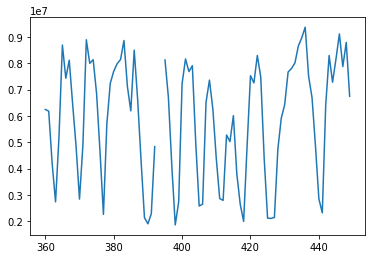

In [39]:
plt.plot(train_merge[train_merge.ForecastId==2].Value)